## Fashion MNIST
1. Train a machine learning model to classify type of clothing
2. Using Tensorflow and Keras
3. Using the Fashion MNIST Database

### Load the Fashion Mnist dataset

Transorming x_train and x_test shape to get a 28*28 table for each image  
I also divide by 255.0 to get gray scale between 0 and 1 in float  
We also transform the test dataset and y_train from a list to a numpy array

In [1]:
from mnist import MNIST
import numpy as np


fashion_mnist_data = MNIST('./data/')

x_train, y_train = fashion_mnist_data.load_training()
x_test, y_test = fashion_mnist_data.load_testing()
x_train, x_test = np.reshape(x_train, (60000, 28, 28)) / 255.0, np.reshape(x_test, (10000, 28, 28)) / 255.0
x_test, y_test, y_train = np.array(x_test), np.array(y_test), np.array(y_train)



### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


### Display examples

Display the 5 first clothes

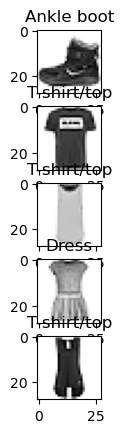

In [2]:
import matplotlib.pyplot as plt
import matplotlib

clothing_types = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
f, axarr = plt.subplots(5,1)
for i in range(5):
    axarr[i].imshow(x_train[i], cmap='Greys')
    axarr[i].set_title(clothing_types[y_train[i]])

### Create ML model

In [3]:
import os
os.environ['TF_CPP_MIN_lOG_LEVEL'] = '3'
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flatten layer to fit dimensions, tr transform the 28*28 images into 784 1-dimensional array
    tf.keras.layers.Dense(128, activation='relu'), #Dense layer with 128 units
    tf.keras.layers.Dropout(0.2), #Dropout layer of 20%
    tf.keras.layers.Dense(10) #Flatten layer because 10 possible output
])


2023-01-30 14:21:20.860338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 14:21:21.870131: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/matteo/anaconda3/lib
2023-01-30 14:21:21.870219: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/matteo/anaconda3/lib
2023-01-30 14:21:21.870225: W tensorflow/compiler/tf2tensorrt/utils/py_uti

TensorFlow version: 2.11.0


2023-01-30 14:21:22.740611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 14:21:22.751569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 14:21:22.751625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 14:21:22.752035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

### Predictions without training

The model is now created, but not trained.  
Let's try to ask him to predict the value of the first 5 clothes in the train dataset to see what is the result without training.

1/1 [==============================] - 5s 5s/step
Prediction for clothe 0 : Bag | actual clothe type is Ankle boot
1/1 [==============================] - 0s 53ms/step
Prediction for clothe 1 : T-shirt/top | actual clothe type is T-shirt/top
1/1 [==============================] - 0s 41ms/step
Prediction for clothe 2 : Pullover | actual clothe type is T-shirt/top
1/1 [==============================] - 0s 24ms/step
Prediction for clothe 3 : Bag | actual clothe type is Dress
1/1 [==============================] - 0s 29ms/step
Prediction for clothe 4 : Pullover | actual clothe type is T-shirt/top


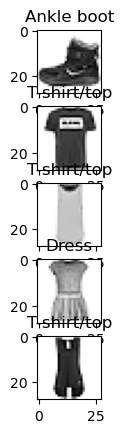

In [4]:
def get_preditect_clothe(input):
    model_answer = model.predict( np.array( [input] ) )[0]
    return clothing_types[ np.where( model_answer == np.amax(model_answer) )[0][0] ]

f, axarr = plt.subplots(5,1)
for i in range(5):
    print(f"Prediction for clothe {i} : {get_preditect_clothe(x_train[i])} | actual clothe type is {clothing_types[ y_train[i] ]}")
    axarr[i].imshow(x_train[i], cmap='Greys')
    axarr[i].set_title(clothing_types[y_train[i]])


## Bad results

As we can see, the preditect results are all bad, we need to train the model to make it more accurate. 

### Model compilation

What we want to do is to evaluate the model to see what its accuracy, loss, etc...  
Before doing so, we must compile the model using the ``compile()`` method.  
The ``compile()`` method configures and makes the model for training and evaluation process.  
We pass several parameters to the ``compile()`` method in order to configure the model with an ``optimize``, ``loss`` and ``metrics``.  
!!! The ``compile()`` directly affects the object, it returns ``None``  
In our example, we use the "adam" optimize with the built-in "Sparse Categorical Crossentropy" loss function and we measure the accuracy of the model predictions as well as the false negatives and false positives


In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        'accuracy',
    ]
)

### Model evaluation without training
 
Before training the model, let's try to evaluate the model using the evaluate method

In [6]:
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 4s - loss: 2.3782 - accuracy: 0.1230 - 4s/epoch - 2ms/step


[2.378239154815674, 0.12303332984447479]

We can see that the loss is 2.5 and the accuracy is only 0.12 (12%).  
As of now, the model is really bad at preticting clothes but this is because it is not trained yet.


### Model training

In [7]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-01-11 14:53:55.604061: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x35391e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-11 14:53:55.604144: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-01-11 14:53:55.757928: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-11 14:53:56.700641: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-11 14:53:56.925496: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 3ms/step - loss: 0.5248 - accuracy: 0.8135
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3961 - accuracy: 0.8551
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3638 - accuracy: 0.8669
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3449 - accuracy: 0.8737
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3296 - accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3166 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3069 - accuracy: 0.8874
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.8892
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2891 - accuracy: 0.8937
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2840 - accurac

### Re evaluate the model after training

We evaluate the model again but this time with the testing set because he has never seen it yet.  
This is like this that we can now if the model has learned from itself

In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.3301 - accuracy: 0.8815 - 1s/epoch - 3ms/step


[0.3301030099391937, 0.8815000057220459]

This time we can see a clear upgrade in the model prediction. Loss only 0.33 and accuracy up to 88%